In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import sys

import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# params = {'font.size':14,'font.family':'lmodern','xtick.labelsize':16, 'ytick.labelsize':16,}

# plt.style.use('../../style.mplstyle')
# colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../WaveformAnalysis/')

import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt
import IVCurve as IVCurve
import importlib
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.special import erfc
import scipy.signal as spsig

In [2]:
def get_color_map(n,name='magma'):
    colormap=plt.get_cmap(name)
    cNorm= colors.Normalize(vmin=0,vmax=n-1)
    scalarMap=cmx.ScalarMappable(norm=cNorm,cmap=colormap)
    outmap=[]
    for i in range(n):
        outmap.append(scalarMap.to_rgba(i))
    return outmap,scalarMap

/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/24C.h5


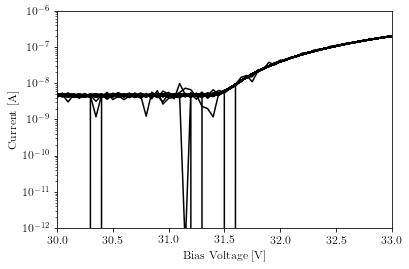

In [3]:
data_24C = IVCurve.IVCurve(Path='/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/', Selection='*24C.h5')
for File in data_24C.Files:
    print(File)
    data_24C.get_data()
    data_24C.get_average()
    data_24C.get_gradient(data_24C.AvgVoltage,data_24C.AvgCurrent)
    data_24C.format_timestamp(Format='datetime')
    data_24C.plot()

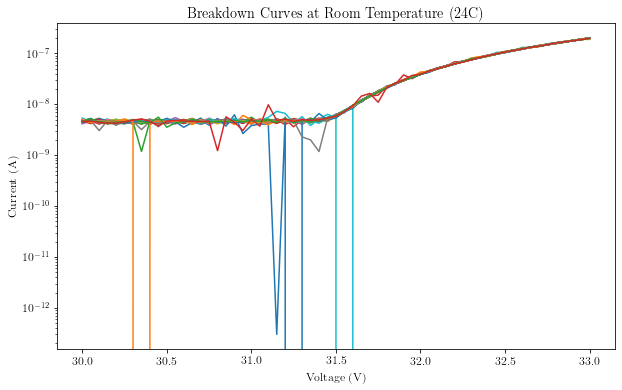

In [4]:
plt.figure(figsize=(10,6))
for x,y,z in zip(data_24C.Voltage,data_24C.Current,data_24C.Timestamp):
    plt.plot(x,y,label=z)
# plt.legend(loc=2)
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Breakdown Curves at Room Temperature (24C)')
plt.yscale('log')
plt.show()
    

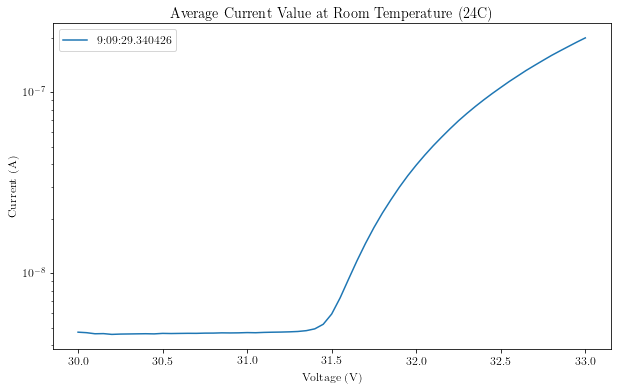

In [5]:
plt.figure(figsize=(10,6))
# print (data_24C.AvgCurrent)
# print (data_24C.AvgVoltage)
# print (data_24C.AvgTimestamp)
# print (data_24C.Datetime)
for x,y,z in zip(data_24C.AvgVoltage,data_24C.AvgCurrent,data_24C.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
plt.legend(loc='upper left')
plt.yscale('log')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Average Current Value at Room Temperature (24C)')
plt.show()



[]
[]


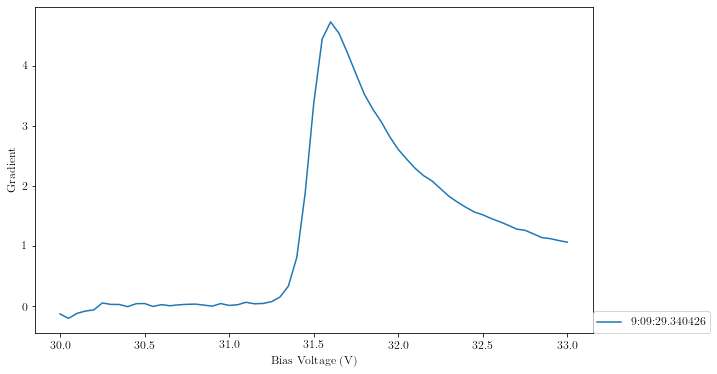

In [6]:
breakdownV=[]
timestampT=[]
plt.figure(figsize=(10,6))
# print (len(data_2.Gradient))

for x,y,z in zip(data_24C.AvgVoltage,data_24C.Gradient,data_24C.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
#     print(np.where(y==np.max(y)))
    cut=np.where(y==np.max(y))
#     print(x[cut])
#     breakdownV.append(x[cut])
#     timestampT.append(z)
print(breakdownV)
print(timestampT)
# plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Gradient')
plt.legend(loc=(1.0,0))
plt.show()

In [7]:
data = IVCurve.IVCurve(Path='/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/', Selection='*Cooldown.h5')
for File in data.Files:
    print(File)
    data.get_data()
    print(len(data.Current))
    data.get_average(Size=10)
    print(len(data.Current))
    data.get_gradient(data.AvgVoltage,data.AvgCurrent)
    data.format_timestamp(Format='datetime')
#     data.plot()

/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/Cooldown.h5
170
170


170


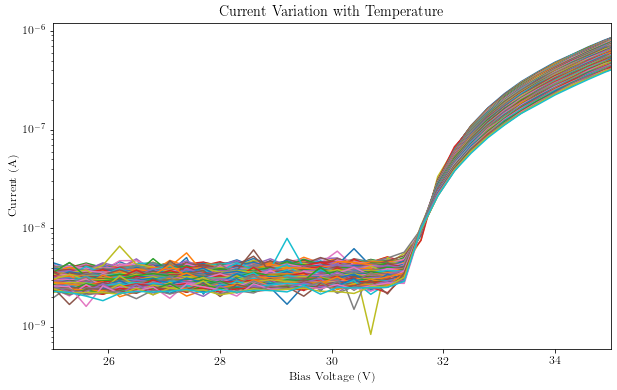

In [8]:
plt.figure(figsize=(10,6))
print(len(data.Current))
color_array,sm=get_color_map(len(data.Current))
for x,y,z in zip(data.Voltage,data.Current,data.Timestamp):
    plt.plot(x,y,label=z)#,color=color_array[y])
# plt.legend(loc=2)
plt.xlim(25,35)
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Current Variation with Temperature')
plt.yscale('log')
plt.show()
    

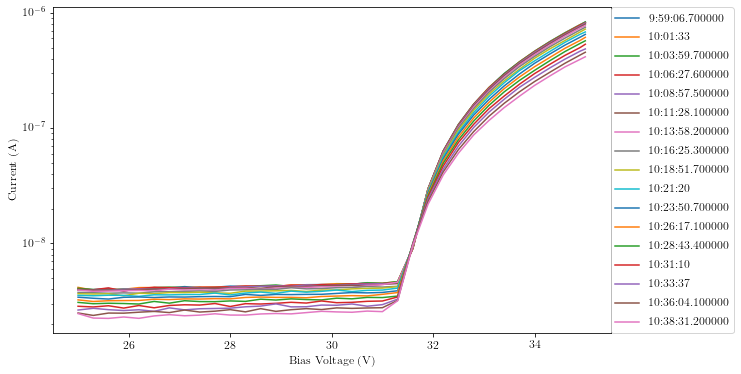

In [9]:
plt.figure(figsize=(10,6))
# print (data.AvgCurrent)
# print(data.AvgVoltage)
for x,y,z in zip(data.AvgVoltage,data.AvgCurrent,data.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.legend(loc=(1.0,0))
plt.show()

[]
[]


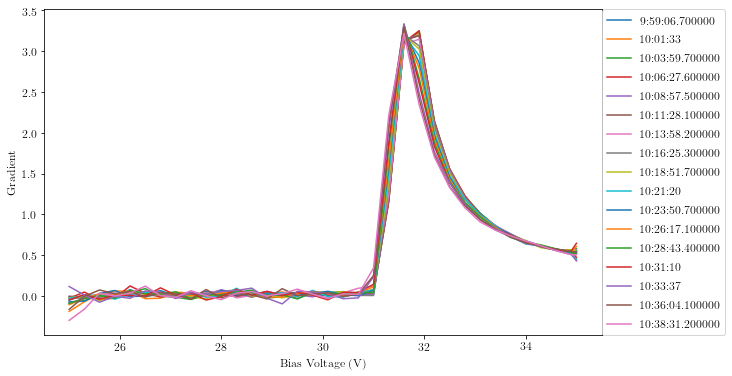

[array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6])]
[35946.7, 36093.0, 36239.7, 36387.6, 36537.5, 36688.1, 36838.2, 36985.3, 37131.7, 37280.0, 37430.7, 37577.1, 37723.4, 37870.0, 38017.0, 38164.1, 38311.2]


In [10]:
plt.figure(figsize=(10,6))
# print (len(data.Gradient))
print(breakdownV)
print(timestampT)
for x,y,z in zip(data.AvgVoltage,data.Gradient,data.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
#     print(np.max(y))
#     print(np.where(y==np.max(y)))
    cut=np.where(y==np.max(y))
#     print(x[cut])
    breakdownV.append(x[cut])
    timestampT.append(z)
# plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Gradient')
plt.legend(loc=(1.0,0))
plt.show()

print(breakdownV)
print(timestampT)

In [11]:
data_2=IVCurve.IVCurve(Path='/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/',Selection='*Cooldown_2.h5')
for File in data_2.Files:
    print (File)
    data_2.get_data()
    print(len(data_2.Current))
    data_2.get_average(Size=20)
    print(len(data_2.Current))
    data_2.get_gradient(data_2.AvgVoltage,data_2.AvgCurrent)
    data_2.format_timestamp(Format='datetime')

/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/Cooldown_2.h5
214
214


214


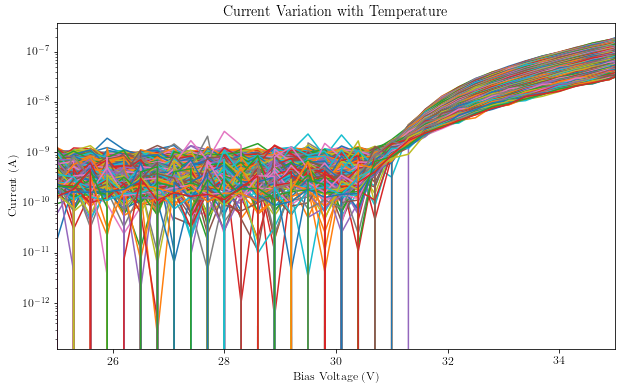

In [12]:
plt.figure(figsize=(10,6))
print(len(data_2.Current))
color_array,sm=get_color_map(len(data_2.Current))
for x,y,z in zip(data_2.Voltage,data_2.Current,data_2.Timestamp):
    plt.plot(x,y,label=z)#,color=color_array[y])
# plt.legend(loc=2)
plt.xlim(25,35)
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Current Variation with Temperature')
plt.yscale('log')
plt.show()

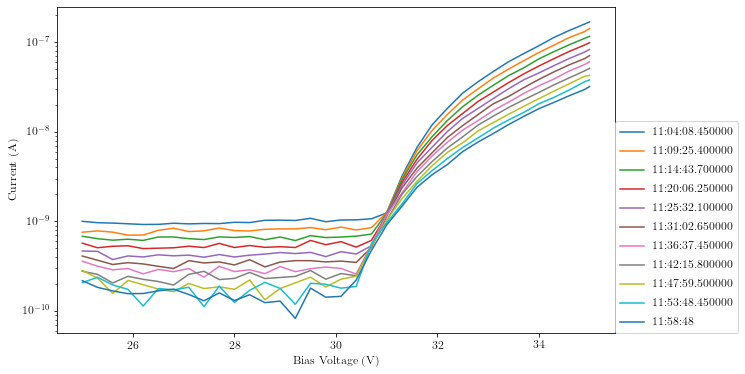

In [13]:
plt.figure(figsize=(10,6))
# print (data_2.AvgCurrent)
# print(data_2.AvgVoltage)
for x,y,z in zip(data_2.AvgVoltage,data_2.AvgCurrent,data_2.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.legend(loc=(1.0,0))
plt.show()

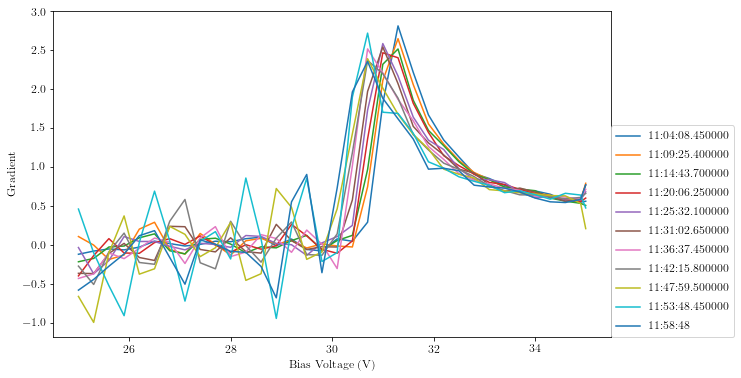

[array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.3]), array([31.3]), array([31.3]), array([31.]), array([31.]), array([31.]), array([30.7]), array([30.7]), array([30.7]), array([30.7]), array([30.7])]
[35946.7, 36093.0, 36239.7, 36387.6, 36537.5, 36688.1, 36838.2, 36985.3, 37131.7, 37280.0, 37430.7, 37577.1, 37723.4, 37870.0, 38017.0, 38164.1, 38311.2, 39848.45, 40165.4, 40483.7, 40806.25, 41132.1, 41462.65, 41797.45, 42135.8, 42479.5, 42828.45, 43128.0]


In [14]:
plt.figure(figsize=(10,6))
# print (len(data_2.Gradient))

for x,y,z in zip(data_2.AvgVoltage,data_2.Gradient,data_2.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
#     print(np.where(y==np.max(y)))
    cut=np.where(y==np.max(y))
#     print(x[cut])
    breakdownV.append(x[cut])
    timestampT.append(z)    
# plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Gradient')
plt.legend(loc=(1.0,0))
plt.show()
print(breakdownV)
print(timestampT)

In [15]:
data_3=IVCurve.IVCurve(Path='/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/',Selection='*Cooldown_3.h5')
for File in data_3.Files:
    print (File)
    data_3.get_data()
    print(len(data_3.Current))
    data_3.get_average()
    print(len(data_3.Current))
    data_3.get_gradient(data_3.AvgVoltage,data_3.AvgCurrent)
    data_3.format_timestamp(Format='datetime')

/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/Cooldown_3.h5
24
24


24


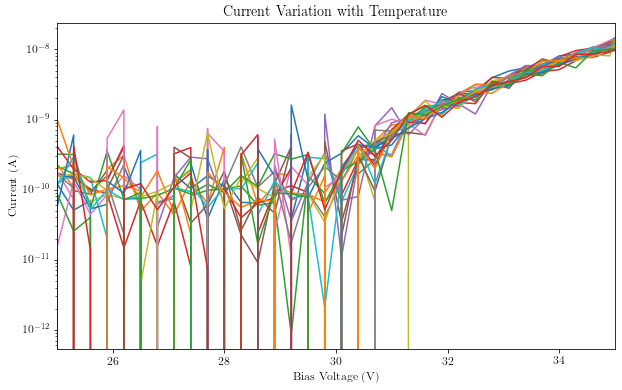

In [16]:
plt.figure(figsize=(10,6))
print(len(data_3.Current))
color_array,sm=get_color_map(len(data_3.Current))
for x,y,z in zip(data_3.Voltage,data_3.Current,data_3.Timestamp):
    plt.plot(x,y,label=z)#,color=color_array[y])
# plt.legend(loc=2)
plt.xlim(25,35)
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Current Variation with Temperature')
plt.yscale('log')
plt.show()

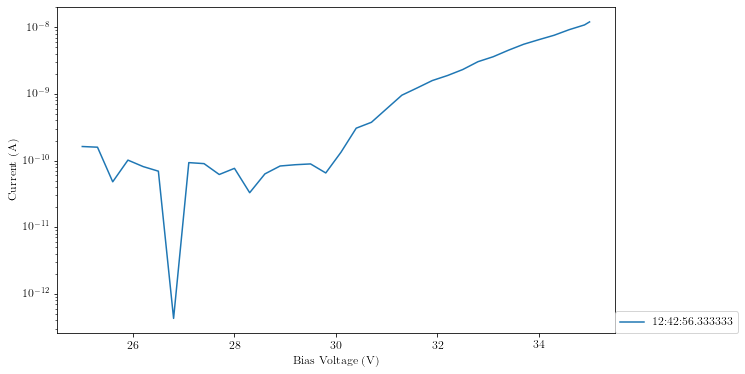

In [17]:
plt.figure(figsize=(10,6))
# print (data_3.AvgCurrent)
# print(data_3.AvgVoltage)
for x,y,z in zip(data_3.AvgVoltage,data_3.AvgCurrent,data_3.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.legend(loc=(1.0,0))
plt.show()

[30.1]


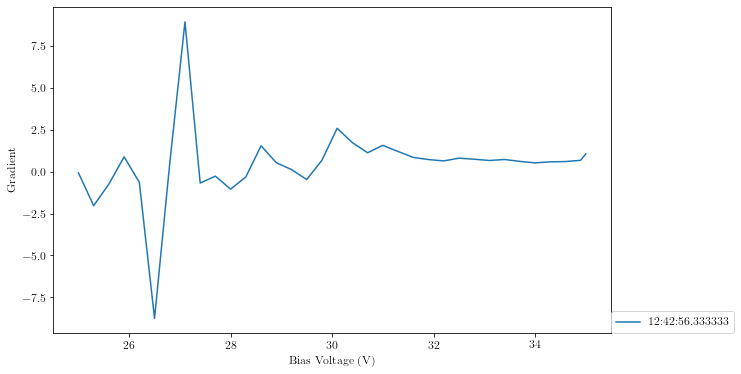

[array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.3]), array([31.3]), array([31.3]), array([31.]), array([31.]), array([31.]), array([30.7]), array([30.7]), array([30.7]), array([30.7]), array([30.7]), array([30.1])]
[35946.7, 36093.0, 36239.7, 36387.6, 36537.5, 36688.1, 36838.2, 36985.3, 37131.7, 37280.0, 37430.7, 37577.1, 37723.4, 37870.0, 38017.0, 38164.1, 38311.2, 39848.45, 40165.4, 40483.7, 40806.25, 41132.1, 41462.65, 41797.45, 42135.8, 42479.5, 42828.45, 43128.0, 45776.333333333336]


In [18]:
plt.figure(figsize=(10,6))
# print (len(data_3.Gradient))

for x,y,z in zip(data_3.AvgVoltage,data_3.Gradient,data_3.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
#     print(np.where(y==np.max(y>2.4 and y<2.6)))
    cut=np.where(x>28)
    cut2=np.where(y[cut]==np.max(y[cut]))
#     cut=np.where((y>2.4 and y<2.6).any())
    print(x[cut][cut2])
    breakdownV.append(x[cut][cut2])
    timestampT.append(z)  
# plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Gradient')
plt.legend(loc=(1.0,0))
plt.show()
print(breakdownV)
print(timestampT)

In [19]:
data_4=IVCurve.IVCurve(Path='/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/',Selection='*Cooldown_4.h5')
for File in data_4.Files:
    print (File)
    data_4.get_data()
    print(len(data_4.Current))
    data_4.get_average(Size=24)
    print(len(data_4.Current))
    data_4.get_gradient(data_4.AvgVoltage,data_4.AvgCurrent)
    data_4.format_timestamp(Format='datetime')

/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/Cooldown_4.h5
48
48


48


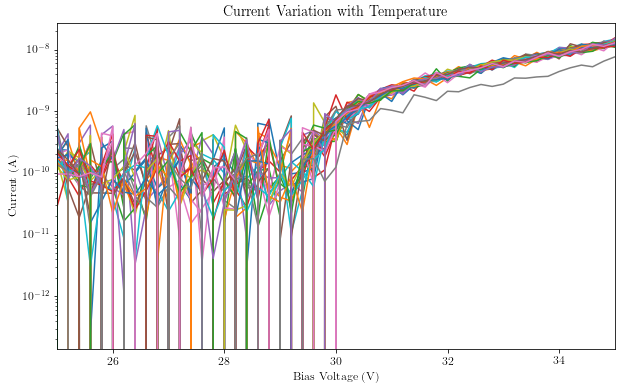

In [20]:
plt.figure(figsize=(10,6))
print(len(data_4.Current))
color_array,sm=get_color_map(len(data_4.Current))
for x,y,z in zip(data_4.Voltage,data_4.Current,data_4.Timestamp):
    plt.plot(x,y,label=z)#,color=color_array[y])
# plt.legend(loc=2)
plt.xlim(25,35)
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Current Variation with Temperature')
plt.yscale('log')
plt.show()

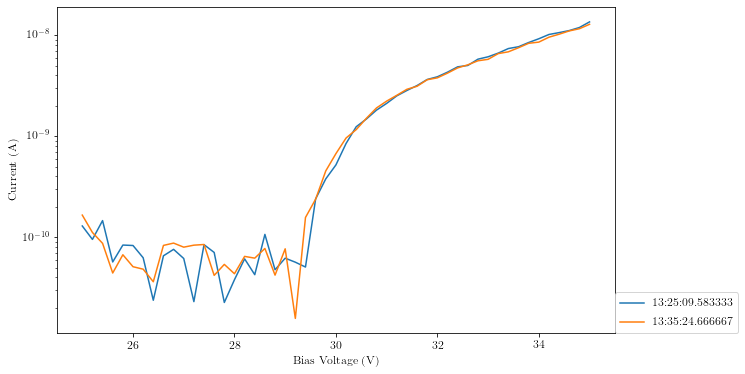

In [21]:
plt.figure(figsize=(10,6))

for x,y,z in zip(data_4.AvgVoltage,data_4.AvgCurrent,data_4.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.legend(loc=(1.0,0))
plt.show()

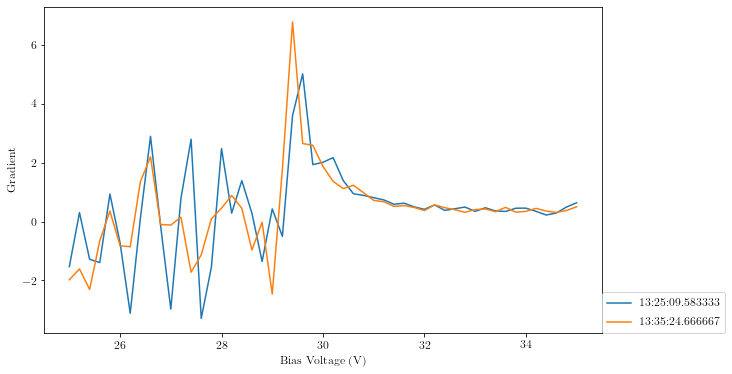

[array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.3]), array([31.3]), array([31.3]), array([31.]), array([31.]), array([31.]), array([30.7]), array([30.7]), array([30.7]), array([30.7]), array([30.7]), array([30.1]), array([29.6]), array([29.4])]
[35946.7, 36093.0, 36239.7, 36387.6, 36537.5, 36688.1, 36838.2, 36985.3, 37131.7, 37280.0, 37430.7, 37577.1, 37723.4, 37870.0, 38017.0, 38164.1, 38311.2, 39848.45, 40165.4, 40483.7, 40806.25, 41132.1, 41462.65, 41797.45, 42135.8, 42479.5, 42828.45, 43128.0, 45776.333333333336, 48309.583333333336, 48924.666666666664]


In [22]:
plt.figure(figsize=(10,6))
# print (len(data_4.Gradient))

for x,y,z in zip(data_4.AvgVoltage,data_4.Gradient,data_4.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
#     print(np.where(y==np.max(y)))
    cut=np.where(y==np.max(y))
#     print(x[cut])
    breakdownV.append(x[cut])
    timestampT.append(z)  
# plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Gradient')
plt.legend(loc=(1.0,0))
plt.show()
print(breakdownV)
print(timestampT)

In [23]:
data_5=IVCurve.IVCurve(Path='/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/',Selection='*Cooldown_5.h5')
for File in data_5.Files:
    print (File)
    data_5.get_data()
    print(len(data_5.Current))
    data_5.get_average(Size=48)
    print(len(data_5.Current))
    data_5.get_gradient(data_5.AvgVoltage,data_5.AvgCurrent)
    data_5.format_timestamp(Format='datetime')

/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/Cooldown_5.h5
96
96


96


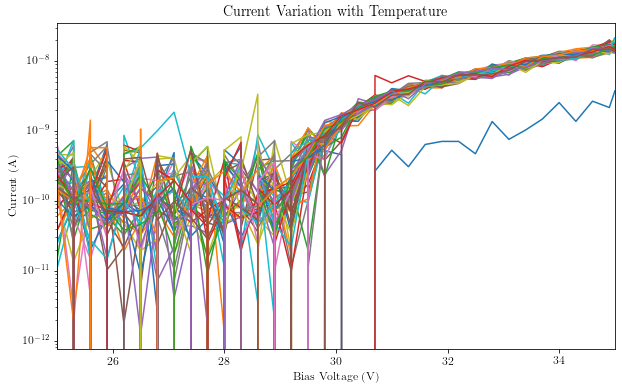

In [24]:
plt.figure(figsize=(10,6))
print(len(data_5.Current))
color_array,sm=get_color_map(len(data_5.Current))
for x,y,z in zip(data_5.Voltage,data_5.Current,data_5.Timestamp):
    plt.plot(x,y,label=z)#,color=color_array[y])
# plt.legend(loc=2)
plt.xlim(25,35)
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Current Variation with Temperature')
plt.yscale('log')
plt.show()

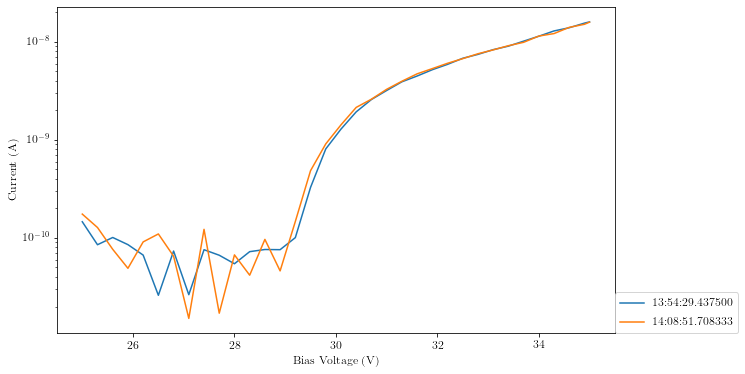

In [25]:
plt.figure(figsize=(10,6))
# print (data_5.AvgCurrent)
# print(data_5.AvgVoltage)
for x,y,z in zip(data_5.AvgVoltage,data_5.AvgCurrent,data_5.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.legend(loc=(1.0,0))
plt.show()

(array([15]),)
[29.5]
(array([14]),)
[29.2]


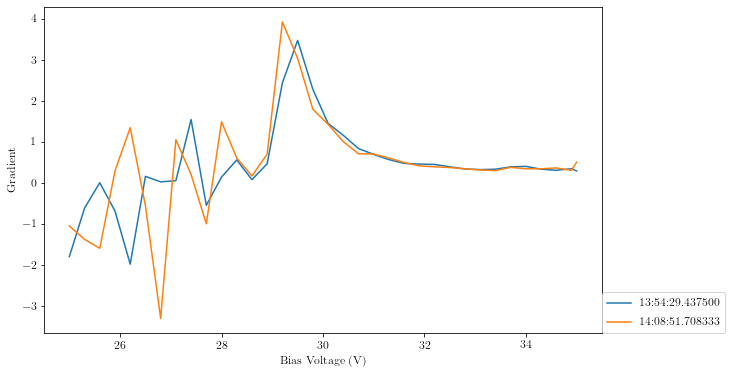

[array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.3]), array([31.3]), array([31.3]), array([31.]), array([31.]), array([31.]), array([30.7]), array([30.7]), array([30.7]), array([30.7]), array([30.7]), array([30.1]), array([29.6]), array([29.4]), array([29.5]), array([29.2])]
[35946.7, 36093.0, 36239.7, 36387.6, 36537.5, 36688.1, 36838.2, 36985.3, 37131.7, 37280.0, 37430.7, 37577.1, 37723.4, 37870.0, 38017.0, 38164.1, 38311.2, 39848.45, 40165.4, 40483.7, 40806.25, 41132.1, 41462.65, 41797.45, 42135.8, 42479.5, 42828.45, 43128.0, 45776.333333333336, 48309.583333333336, 48924.666666666664, 50069.4375, 50931.708333333336]


In [26]:
plt.figure(figsize=(10,6))
# print (len(data_5.Gradient))

for x,y,z in zip(data_5.AvgVoltage,data_5.Gradient,data_5.AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
    print(np.where(y==np.max(y)))
    cut=np.where(y==np.max(y))
    print(x[cut])
    breakdownV.append(x[cut])
    timestampT.append(z)    
# plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Gradient')
plt.legend(loc=(1.0,0))
plt.show()
print(breakdownV)
print(timestampT)

In [27]:
data_6=IVCurve.IVCurve(Path='/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/',Selection='*Cooldown_6.h5')
for File in data_6.Files:
    print (File)
    data_6.get_data()
    print(len(data_6.Current))
    data_6.get_average(Size=10)
    print(len(data_6.Current))
    data_6.get_gradient(data_6.AvgVoltage,data_6.AvgCurrent)
    data_6.format_timestamp(Format='datetime')

/project/david_moore/aj487/Data_WL110/LXe_Setup/SiPM/20211108/Cooldown_6.h5
172
172


../../../purity-monitor/IVCurve.py:33: RuntimeWarning: invalid value encountered in log
  grad = np.gradient(np.log(y))/np.gradient(x)
../../../purity-monitor/IVCurve.py:33: RuntimeWarning: divide by zero encountered in true_divide
  grad = np.gradient(np.log(y))/np.gradient(x)


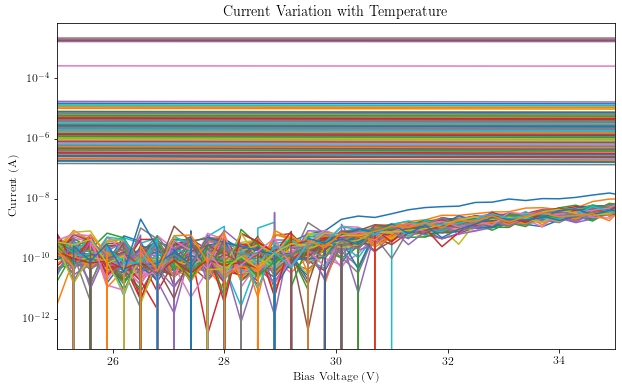

In [28]:
plt.figure(figsize=(10,6))
# print((data_6.Current))
# print(data_6.Voltage)
# print(data_6.Timestamp)
color_array,sm=get_color_map(len(data_6.Current))
for x,y,z in zip(data_6.Voltage,data_6.Current,data_6.Timestamp):
    plt.plot(x,y,label=z)#,color=color_array[y])
# plt.legend(loc=2)
plt.xlim(25,35)
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Current Variation with Temperature')
plt.yscale('log')
plt.show()

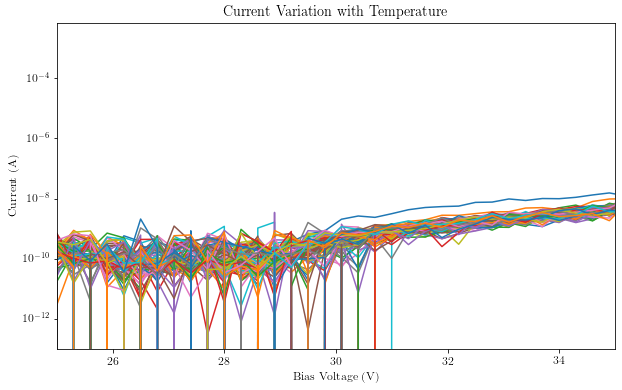

172


In [29]:
plt.figure(figsize=(10,6))
data_6_Voltage=[]
data_6_Current=[]
data_6_Timestamp=[]
color_array,sm=get_color_map(len(data_6.Current))
for x,y,z in zip(data_6.Voltage,data_6.Current,data_6.Timestamp):
    cut=np.where(x!=-999.)
    plt.plot(x[cut],y[cut],label=z)#,color=color_array[y])
    data_6_Voltage.append(x[cut])
    data_6_Current.append(y[cut])
    data_6_Timestamp.append(z)
# plt.legend(loc=2)
plt.xlim(25,35)
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Current Variation with Temperature')
plt.yscale('log')
plt.show()
# print (data_6_Voltage)
# print (data_6_Current)
print (len(data_6_Voltage))

In [30]:
from itertools import zip_longest
Size=86
data_6_AvgVoltage=[]
data_6_AvgCurrent=[]
data_6_AvgTimestamp=[]
for x in range(len(data_6_Current)):
            ii = x*Size
            if ii >= len(data_6_Current):
                break
#             voltage = np.mean(data_6_Voltage[ii:ii+Size], axis=0)
#             current = np.median(data_6_Current[ii:ii+Size], axis=0)
            voltage=np.nanmean(np.array(list(zip_longest(*data_6_Voltage[ii:ii+Size])),dtype=float),axis=1)
            current=np.nanmedian(np.array(list(zip_longest(*data_6_Current[ii:ii+Size])),dtype=float),axis=1)
            timestamp = np.mean([float(x) for x in data_6_Timestamp[ii:ii+Size]])
            data_6_AvgVoltage.append(voltage)
            data_6_AvgCurrent.append(current)
            data_6_AvgTimestamp.append(timestamp)

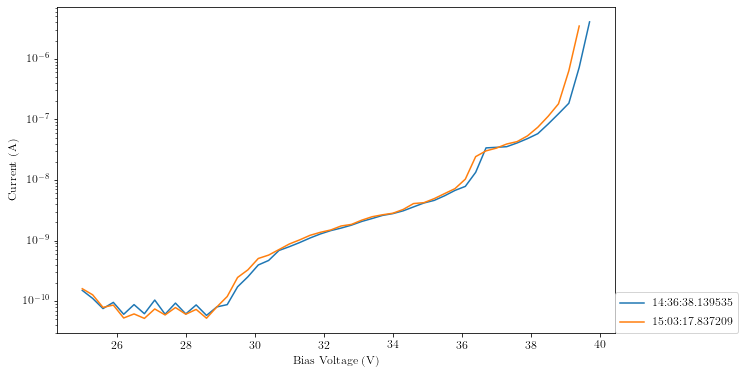

In [31]:
plt.figure(figsize=(10,6))
# print (data_5.AvgCurrent)
# print(data_5.AvgVoltage)
for x,y,z in zip(data_6_AvgVoltage,data_6_AvgCurrent,data_6_AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.legend(loc=(1.0,0))
plt.show()

In [32]:
data_6_Gradient=[]
for x,y in zip(data_6_AvgVoltage,data_6_AvgCurrent):
            grad = np.gradient(np.log(y))/np.gradient(x)
            data_6_Gradient.append(grad)

[29.5]
[29.2]


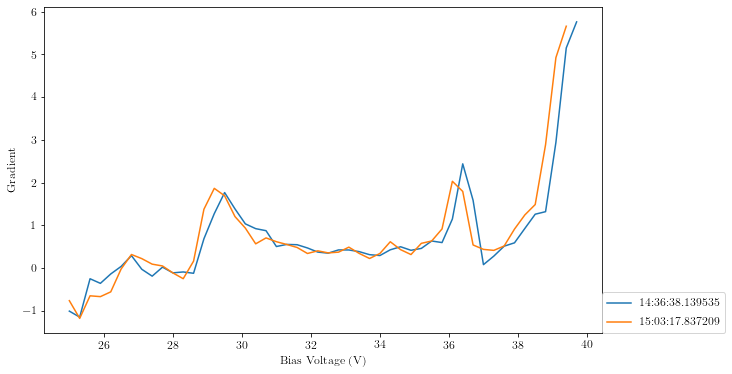

[array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.9]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.6]), array([31.3]), array([31.3]), array([31.3]), array([31.]), array([31.]), array([31.]), array([30.7]), array([30.7]), array([30.7]), array([30.7]), array([30.7]), array([30.1]), array([29.6]), array([29.4]), array([29.5]), array([29.2]), array([29.5]), array([29.2])]
[35946.7, 36093.0, 36239.7, 36387.6, 36537.5, 36688.1, 36838.2, 36985.3, 37131.7, 37280.0, 37430.7, 37577.1, 37723.4, 37870.0, 38017.0, 38164.1, 38311.2, 39848.45, 40165.4, 40483.7, 40806.25, 41132.1, 41462.65, 41797.45, 42135.8, 42479.5, 42828.45, 43128.0, 45776.333333333336, 48309.583333333336, 48924.666666666664, 50069.4375, 50931.708333333336, 52598.13953488372, 54197.83720930233]


In [33]:
plt.figure(figsize=(10,6))
# print (len(data_6_Gradient))

for x,y,z in zip(data_6_AvgVoltage,data_6_Gradient,data_6_AvgTimestamp):
    plt.plot(x,y,label=dt.timedelta(seconds=z))
#     print(np.where(y==np.max(y)))
    cut=np.where(x<30)
    cut2=np.where(y[cut]==np.max(y[cut]))
    print(x[cut][cut2])
    breakdownV.append(x[cut][cut2])
    timestampT.append(z)    
# plt.yscale('log')
plt.xlabel('Bias Voltage (V)')
plt.ylabel('Gradient')
plt.legend(loc=(1.0,0))
plt.show()
print(breakdownV)
print(timestampT)

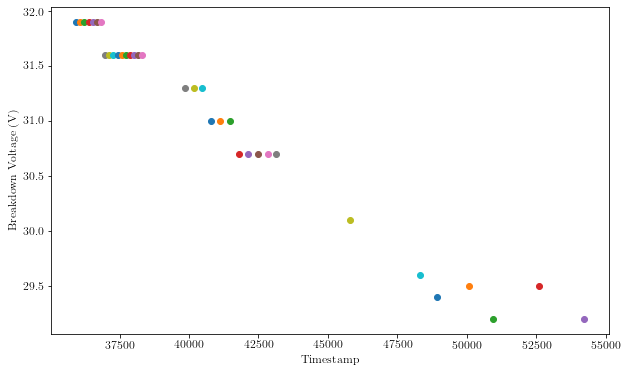

In [34]:
plt.figure(figsize=(10,6))
for x,y in zip(timestampT,breakdownV):
    plt.scatter(x,y)
plt.ylabel('Breakdown Voltage (V)')
plt.xlabel('Timestamp')
plt.show()

In [36]:
# plt.figure(figsize=(10,6))
timestamp_T=[]
breakdown_V=[]
for x,y in zip(breakdownV,timestampT):
    if x not in breakdown_V:
        breakdown_V.append(x)
        timestamp_T.append(y)
    
print(breakdown_V)
print (timestamp_T)
# plt.scatter(x,y)
# plt.ylabel('Breakdown Voltage (V)')
# plt.xlabel('Timestamp')
# plt.show()

[array([31.9]), array([31.6]), array([31.3]), array([31.]), array([30.7]), array([30.7]), array([30.1]), array([29.6]), array([29.4]), array([29.5]), array([29.2]), array([29.2])]
[35946.7, 36985.3, 39848.45, 40806.25, 41797.45, 43128.0, 45776.333333333336, 48309.583333333336, 48924.666666666664, 50069.4375, 50931.708333333336, 54197.83720930233]


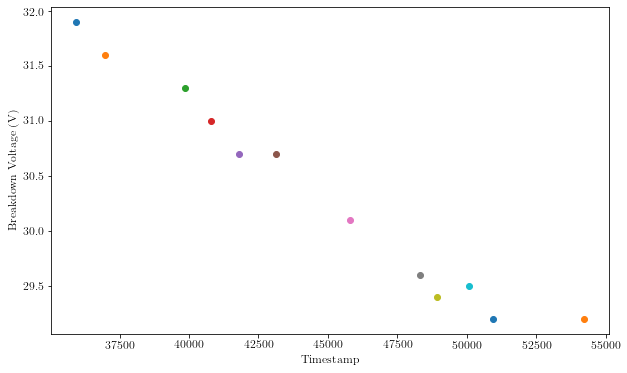

In [37]:
plt.figure(figsize=(10,6))
for x,y in zip(timestamp_T,breakdown_V):
    plt.scatter(x,y)
plt.ylabel('Breakdown Voltage (V)')
plt.xlabel('Timestamp')
plt.show()

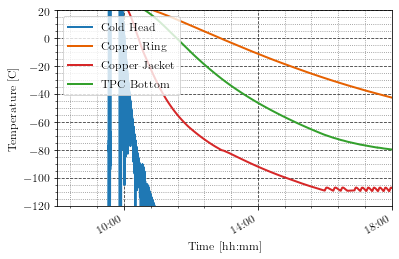

In [38]:
Sensors = []
Files = ['/project/david_moore/aj487/Data_WL110/LXe_Setup/Sensors/20211108.h5']
for File in Files: 
    Sensor = Monitor.SensorData(Filepath=File)
    Sensor.GetData()
    Sensors.append(Sensor)

AllSensors = Monitor.SensorData()
AllSensors.Combine(Sensors)
XRange = [dt.datetime(2021,11,8,8,0), dt.datetime(2021,11,8,18,0)]
AllSensors.PlotData(Data=AllSensors.Temp, Selection='Temperature', XTicks=240, YTicks=20, XRange=XRange, YRange=[-120,20])

In [39]:
print (AllSensors.Temp[2])

[  23.64537436   23.6455309    23.6455309  ... -107.02182954 -107.02556428
 -107.02556428]


In [40]:
print(AllSensors.Time)

[datetime.datetime(2021, 11, 8, 0, 0, 0, 4601)
 datetime.datetime(2021, 11, 8, 0, 0, 0, 503994)
 datetime.datetime(2021, 11, 8, 0, 0, 1, 6093) ...
 datetime.datetime(2021, 11, 8, 23, 30, 39, 265108)
 datetime.datetime(2021, 11, 8, 23, 30, 39, 765108)
 datetime.datetime(2021, 11, 8, 23, 30, 40, 266108)]


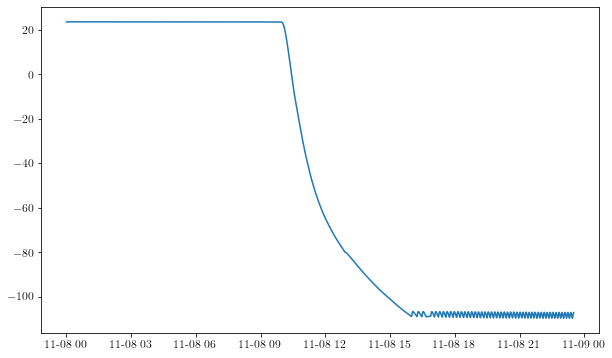

In [41]:
plt.figure(figsize=(10,6))
# for temp,time in zip(AllSensors.Temp[2],AllSensors.Time):
plt.plot(AllSensors.Time,AllSensors.Temp[2])
plt.show()

In [42]:
time_sec=[]
start=dt.datetime(2021,11,8,0,0)
for time in AllSensors.Time:
    time_sec.append((time-start).seconds)
# print (time_sec)   

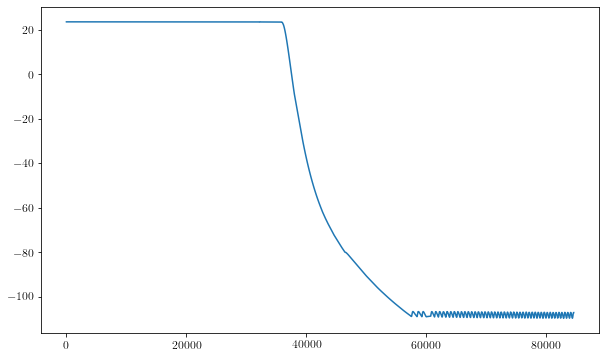

In [43]:
plt.figure(figsize=(10,6))
# for temp,time in zip(AllSensors.Temp[2],AllSensors.Time):
plt.plot(time_sec,AllSensors.Temp[2])
plt.show()

In [44]:
breakdown_temp=[]
for x in (timestamp_T):
    sub=np.abs(np.array(time_sec)-np.array(x))
    cut=np.where(sub==np.min(sub))
#     print(x)
#     print(cut)
    
#     print(AllSensors.Temp[2][cut][0])
    breakdown_temp.append(AllSensors.Temp[2][cut][0])
# print(time_sec)

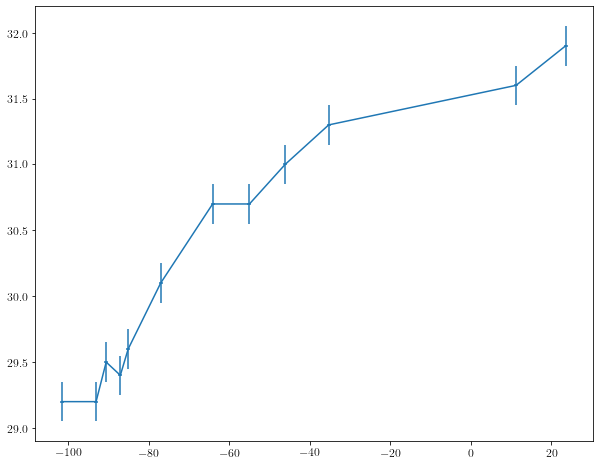

In [45]:
plt.figure(figsize=(10,8))
plt.errorbar(breakdown_temp,breakdown_V,yerr=0.15,xerr=0.5)
plt.show()
# print(breakdown_temp,breakdown_V)

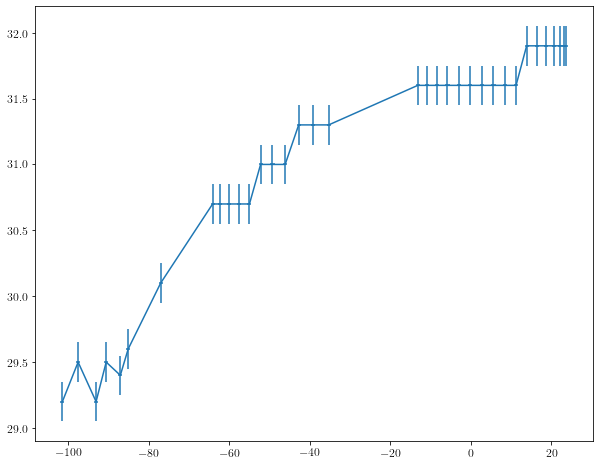

In [46]:
breakdown_temp=[]
for x in (timestampT):
    sub=np.abs(np.array(time_sec)-np.array(x))
    cut=np.where(sub==np.min(sub))
#     print(x)
#     print(cut)
    
#     print(AllSensors.Temp[2][cut][0])
    breakdown_temp.append(AllSensors.Temp[2][cut][0])
# print(time_sec)
plt.figure(figsize=(10,8))
plt.errorbar(breakdown_temp,breakdownV,yerr=0.15,xerr=0.5)
plt.show()
# print(breakdown_temp,breakdown_V)